# 5 Star Project on Near By States Report of Covid19

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [2]:
state_df=pd.read_csv('state_wise.csv')
neighbouring_states=pd.read_csv('neighbouring_states.csv')

In [3]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
State                29 non-null object
Confirmed            29 non-null int64
Recovered            29 non-null int64
Deaths               29 non-null int64
Active               29 non-null int64
Last_Updated_Time    29 non-null object
Migrated_Other       29 non-null int64
State_code           29 non-null object
Delta_Confirmed      29 non-null int64
Delta_Recovered      29 non-null int64
Delta_Deaths         29 non-null int64
State_Notes          10 non-null object
dtypes: int64(8), object(4)
memory usage: 2.8+ KB


In [4]:
state_df.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Maharashtra,206619,111740,8822,86040,5/7/2020 21:06,17,MH,0,0,0,17 cases were marked as non-covid deaths in MH...
1,Tamil Nadu,111151,62778,1510,46863,5/7/2020 20:07,0,TN,0,0,0,2 deaths cross notified to other states from C...
2,Delhi,99444,71339,3067,25038,5/7/2020 19:06,0,DL,0,0,0,"Delhi bulletins in the morning, containing dat..."
3,Gujarat,36123,25900,1944,8279,5/7/2020 20:37,0,GJ,0,0,0,NaN
4,Uttar Pradesh,27707,18761,785,8161,5/7/2020 18:34,0,UP,0,0,0,NaN


In [5]:
state_df.isnull()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
state_list=np.array(state_df['State'])
state_list

array(['Maharashtra', 'Tamil Nadu', 'Delhi', 'Gujarat', 'Uttar Pradesh',
       'Rajasthan', 'West Bengal', 'Madhya Pradesh', 'Haryana',
       'Karnataka', 'Andhra Pradesh', 'Bihar', 'Telangana',
       'Jammu and Kashmir', 'Assam', 'Odisha', 'Punjab', 'Kerala',
       'Uttarakhand', 'Chhattisgarh', 'Jharkhand', 'Tripura', 'Goa',
       'Himachal Pradesh', 'Manipur', 'Nagaland', 'Mizoram',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

In [7]:
confirmed=state_df['Confirmed'].to_numpy()
confirmed

array([206619, 111151,  99444,  36123,  27707,  20164,  22126,  14930,
        17005,  23474,  18697,  11860,  23902,   8429,  11737,   9070,
         6283,   5430,   3124,   3207,   2807,   1580,   1761,   1066,
         1366,    578,    186,    269,    125], dtype=int64)

In [8]:
confirmed_case=dict(zip(state_list,confirmed))
confirmed_case

{'Maharashtra': 206619,
 'Tamil Nadu': 111151,
 'Delhi': 99444,
 'Gujarat': 36123,
 'Uttar Pradesh': 27707,
 'Rajasthan': 20164,
 'West Bengal': 22126,
 'Madhya Pradesh': 14930,
 'Haryana': 17005,
 'Karnataka': 23474,
 'Andhra Pradesh': 18697,
 'Bihar': 11860,
 'Telangana': 23902,
 'Jammu and Kashmir': 8429,
 'Assam': 11737,
 'Odisha': 9070,
 'Punjab': 6283,
 'Kerala': 5430,
 'Uttarakhand': 3124,
 'Chhattisgarh': 3207,
 'Jharkhand': 2807,
 'Tripura': 1580,
 'Goa': 1761,
 'Himachal Pradesh': 1066,
 'Manipur': 1366,
 'Nagaland': 578,
 'Mizoram': 186,
 'Arunachal Pradesh': 269,
 'Sikkim': 125}

In [9]:
recovered=state_df['Recovered'].to_numpy()
recovered

array([111740,  62778,  71339,  25900,  18761,  15928,  14711,  11411,
        12944,   9849,   8422,   8765,  12703,   5255,   7434,   6224,
         4408,   3174,   2524,   2578,   2045,   1206,    936,    724,
          689,    228,    133,     78,     61], dtype=int64)

In [10]:
recovered_case=dict(zip(state_list,recovered))
recovered_case

{'Maharashtra': 111740,
 'Tamil Nadu': 62778,
 'Delhi': 71339,
 'Gujarat': 25900,
 'Uttar Pradesh': 18761,
 'Rajasthan': 15928,
 'West Bengal': 14711,
 'Madhya Pradesh': 11411,
 'Haryana': 12944,
 'Karnataka': 9849,
 'Andhra Pradesh': 8422,
 'Bihar': 8765,
 'Telangana': 12703,
 'Jammu and Kashmir': 5255,
 'Assam': 7434,
 'Odisha': 6224,
 'Punjab': 4408,
 'Kerala': 3174,
 'Uttarakhand': 2524,
 'Chhattisgarh': 2578,
 'Jharkhand': 2045,
 'Tripura': 1206,
 'Goa': 936,
 'Himachal Pradesh': 724,
 'Manipur': 689,
 'Nagaland': 228,
 'Mizoram': 133,
 'Arunachal Pradesh': 78,
 'Sikkim': 61}

In [11]:
deaths=state_df['Deaths'].to_numpy()
deaths

array([8822, 1510, 3067, 1944,  785,  456,  757,  608,  265,  372,  232,
         90,  295,  132,   14,   46,  164,   26,   42,   14,   18,    1,
          7,   10,    0,    0,    0,    1,    0], dtype=int64)

In [12]:
deaths_case=dict(zip(state_list,deaths))
deaths_case

{'Maharashtra': 8822,
 'Tamil Nadu': 1510,
 'Delhi': 3067,
 'Gujarat': 1944,
 'Uttar Pradesh': 785,
 'Rajasthan': 456,
 'West Bengal': 757,
 'Madhya Pradesh': 608,
 'Haryana': 265,
 'Karnataka': 372,
 'Andhra Pradesh': 232,
 'Bihar': 90,
 'Telangana': 295,
 'Jammu and Kashmir': 132,
 'Assam': 14,
 'Odisha': 46,
 'Punjab': 164,
 'Kerala': 26,
 'Uttarakhand': 42,
 'Chhattisgarh': 14,
 'Jharkhand': 18,
 'Tripura': 1,
 'Goa': 7,
 'Himachal Pradesh': 10,
 'Manipur': 0,
 'Nagaland': 0,
 'Mizoram': 0,
 'Arunachal Pradesh': 1,
 'Sikkim': 0}

In [13]:
active=state_df['Active'].to_numpy()
active

array([86040, 46863, 25038,  8279,  8161,  3780,  6658,  2911,  3796,
       13249, 10043,  3005, 10904,  3042,  4286,  2800,  1711,  2228,
         530,   615,   744,   373,   818,   319,   677,   350,    53,
         190,    51], dtype=int64)

In [14]:
active_case=dict(zip(state_list,active))
active_case

{'Maharashtra': 86040,
 'Tamil Nadu': 46863,
 'Delhi': 25038,
 'Gujarat': 8279,
 'Uttar Pradesh': 8161,
 'Rajasthan': 3780,
 'West Bengal': 6658,
 'Madhya Pradesh': 2911,
 'Haryana': 3796,
 'Karnataka': 13249,
 'Andhra Pradesh': 10043,
 'Bihar': 3005,
 'Telangana': 10904,
 'Jammu and Kashmir': 3042,
 'Assam': 4286,
 'Odisha': 2800,
 'Punjab': 1711,
 'Kerala': 2228,
 'Uttarakhand': 530,
 'Chhattisgarh': 615,
 'Jharkhand': 744,
 'Tripura': 373,
 'Goa': 818,
 'Himachal Pradesh': 319,
 'Manipur': 677,
 'Nagaland': 350,
 'Mizoram': 53,
 'Arunachal Pradesh': 190,
 'Sikkim': 51}

In [15]:
neighbouring_list=np.array(neighbouring_states['neighbouring states'])
neighbouring_list

array(['Madhya Pradesh,Chhattisgarh,Karnataka',
       'Kerala,Karnataka,Andhra Pradesh,Puducherry',
       'Haryana,Uttar Pradesh', 'Rajasthan,Madhya Pradesh',
       'Haryana,Uttarakhand,Rajasthan,Madhya Pradesh,Chhattisgarh,Jharkhand,Himachal Pradesh,Bihar',
       'Punjab,Haryana,Uttar Pradesh,Madhya Pradesh,Gujarat',
       'Jharkhand,Bihar,Odisha,Sikkim,Assam',
       'Gujarat,Rajasthan,Uttar Pradesh,Chhattisgarh,Maharashtra.',
       'Punjab,Himachal Pradesh,Rajasthan ',
       'Goa,Maharashtra,Telangana,Andhra Pradesh,Tamil Nadu,Kerala',
       'Odisha,Chhattisgarh,Tamil Nadu,Karnataka,Telangana ',
       'West Bengal,Uttar Pradesh,Jharkhand',
       'Maharashtra,Chhattisgarh,Karnataka,Andhra Pradesh',
       'Himachal Pradesh,Punjab,Ladakh',
       'Arunachal Pradesh,Manipur,Nagaland,Meghalaya,Tripura, Mizoram',
       'West Bengal,Jharkhand,Chhattisgarh,Andhra Pradesh',
       'Jammu and Kashmir,Himachal Pradesh,Haryana,Rajasthan',
       'Tamil Nadu,Karnataka', 'Uttar Prades

In [16]:
neighbour_dic=dict(zip(state_list,neighbouring_list))
neighbour_dic

{'Maharashtra': 'Madhya Pradesh,Chhattisgarh,Karnataka',
 'Tamil Nadu': 'Kerala,Karnataka,Andhra Pradesh,Puducherry',
 'Delhi': 'Haryana,Uttar Pradesh',
 'Gujarat': 'Rajasthan,Madhya Pradesh',
 'Uttar Pradesh': 'Haryana,Uttarakhand,Rajasthan,Madhya Pradesh,Chhattisgarh,Jharkhand,Himachal Pradesh,Bihar',
 'Rajasthan': 'Punjab,Haryana,Uttar Pradesh,Madhya Pradesh,Gujarat',
 'West Bengal': 'Jharkhand,Bihar,Odisha,Sikkim,Assam',
 'Madhya Pradesh': 'Gujarat,Rajasthan,Uttar Pradesh,Chhattisgarh,Maharashtra.',
 'Haryana': 'Punjab,Himachal Pradesh,Rajasthan ',
 'Karnataka': 'Goa,Maharashtra,Telangana,Andhra Pradesh,Tamil Nadu,Kerala',
 'Andhra Pradesh': 'Odisha,Chhattisgarh,Tamil Nadu,Karnataka,Telangana ',
 'Bihar': 'West Bengal,Uttar Pradesh,Jharkhand',
 'Telangana': 'Maharashtra,Chhattisgarh,Karnataka,Andhra Pradesh',
 'Jammu and Kashmir': 'Himachal Pradesh,Punjab,Ladakh',
 'Assam': 'Arunachal Pradesh,Manipur,Nagaland,Meghalaya,Tripura, Mizoram',
 'Odisha': 'West Bengal,Jharkhand,Chhattisga

Enter Your State=Uttar Pradesh
Neighbouring_States= ['Haryana', 'Uttarakhand', 'Rajasthan', 'Madhya Pradesh', 'Chhattisgarh', 'Jharkhand', 'Himachal Pradesh', 'Bihar']
Confirmed_Case in Neighbouring States= [17005, 3124, 20164, 14930, 3207, 2807, 1066, 11860]
Recovered_Case in Neighbouring States= [12944, 2524, 15928, 11411, 2578, 2045, 724, 8765]
Deaths_Case in Neighbouring States= [265, 42, 456, 608, 14, 18, 10, 90]
Active_Case in Neighbouring States= [3796, 530, 3780, 2911, 615, 744, 319, 3005]


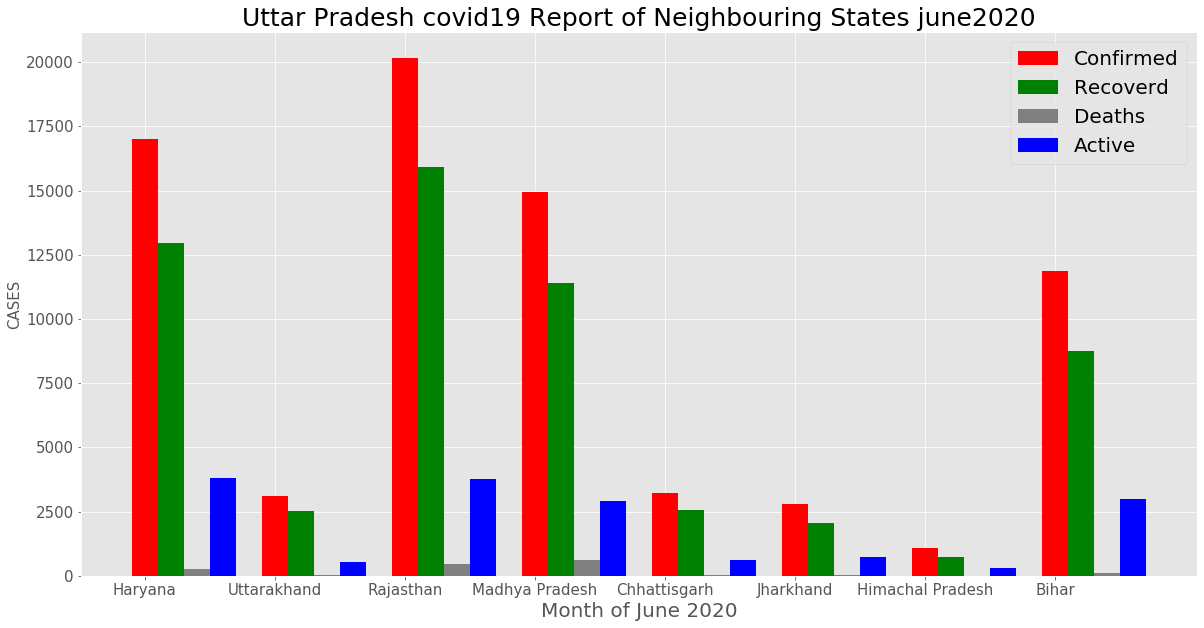

In [21]:
enter_state=input("Enter Your State=").title()
for state in state_list:
    if state.strip()==enter_state.strip():
        neighbour=neighbour_dic[state].split(',')
        print('Neighbouring_States=',neighbour)
        neighbours=np.arange(len(neighbour))
        confirm_case=[]
        recover_case=[]
        death_case=[]
        actived_case=[]
        for i in neighbour:
            c_case=confirmed_case[i]
            r_case=recovered_case[i]
            d_case=deaths_case[i]
            a_case=active_case[i]
            confirm_case.append(c_case)
            recover_case.append(r_case)
            death_case.append(d_case)
            actived_case.append(a_case)
        print('Confirmed_Case in Neighbouring States=',confirm_case)
        print('Recovered_Case in Neighbouring States=',recover_case)
        print('Deaths_Case in Neighbouring States=',death_case)
        print('Active_Case in Neighbouring States=',actived_case)
        style.use('ggplot')
        plt.figure(figsize=(20,10))
        plt.xticks(neighbours,neighbour,fontsize=15)
        plt.yticks(fontsize=15)
        width=0.2
        plt.bar(neighbours,confirm_case,color='red',label='Confirmed',width=0.2)
        plt.bar(neighbours+width,recover_case,color='green',label='Recoverd',width=0.2)
        plt.bar(neighbours+width+width,death_case,color='grey',label='Deaths',width=0.2)
        plt.bar(neighbours+width+width+width,actived_case,color='blue',label='Active',width=0.2)
        plt.title(state+' covid19 Report of Neighbouring States june2020',fontsize=25)
        plt.xlabel('Month of June 2020',fontsize=20)
        plt.ylabel('CASES',fontsize=15)
        plt.legend(fontsize=20)
        plt.savefig(state+' covid19 Report of Neighbouring States june2020 BAR GRAPH.png')
        plt.show()
        break
else:
    print('SORRY:)!!,You Enter Wrong State...')